In [ ]:
from pcnn.parameters import parameters
from pcnn.util import load_data
from pcnn.model import Model

# Load data, define interval
data = load_data('umar')
display(data.head())

,Solar irradiation,Outside temperature,Temperature 272,Temperature 273,Temperature 274,Month sin,Month cos,Weekday,Timestep sin,Timestep cos,Power 272,Power 273,Power 274,Case
2019-05-01 00:00:00,0.0,7.877023,22.2047,24.4094,23.7795,0.5,-0.866025,2,0.000000,1.000000,0.0,0.0,0.0,1.0
2019-05-01 00:15:00,0.0,7.631382,22.2047,24.4094,23.7795,0.5,-0.866025,2,0.065403,0.997859,0.0,0.0,0.0,1.0
2019-05-01 00:30:00,0.0,7.527863,22.2047,24.4094,23.7795,0.5,-0.866025,2,0.130526,0.991445,0.0,0.0,0.0,1.0
2019-05-01 00:45:00,0.0,7.343938,22.2047,24.4094,23.7795,0.5,-0.866025,2,0.195090,0.980785,0.0,0.0,0.0,1.0
2019-05-01 01:00:00,0.0,7.193133,22.2047,24.4094,23.7795,0.5,-0.866025,2,0.258819,0.965926,0.0,0.0,0.0,1.0


In [2]:
## Data parameters
data_params = dict(temperature_column=['Temperature 272', 'Temperature 273', 'Temperature 274'],
                   power_column=['Power 272', 'Power 273', 'Power 274'],  # same order as the temperature columns above!
                   case_column='Case',
                   out_column='Outside temperature',
                   neigh_column=None, # Not needed in LSTM
                   # Put everything that is not covered by the above categories to use as data
                   inputs_D=['Solar irradiation', 'Month sin', 'Month cos', 'Weekday', 'Timestep sin', 'Timestep cos'],
                   outside_walls=[0, 1, 2], # Not used in LSTMs
                   neighboring_rooms=[(0,1), (1,2)]) # Not used in LSTMs

In [3]:
model_params = parameters(name="LSTM",
                            seed=0,
                            overlapping_distance=4,
                            warm_start_length=12,
                            maximum_sequence_length=96*3,
                            minimum_sequence_length=48,
                            learn_initial_hidden_states=True,
                            decrease_learning_rate=False,
                            learning_rate=0.0005,
                            feed_input_through_nn=True,
                            input_nn_hidden_sizes=[32],
                            lstm_hidden_size=64,
                            lstm_num_layers=2,
                            layer_norm=True,
                            batch_size=256,
                            output_nn_hidden_sizes=[32],
                            division_factor=10.,
                            device='cpu',
                            verbose=2)

model_params['initial_values_physical_parameters'] = None # Not needed in LSTMs

# What model to use (PCNN, S_PCNN, M_PCNN, LSTM)
module = 'LSTM'

# Trying to load a model or not, if yes the last one or the best one
load = True
load_last = True

lstm = Model(data=data, module=module, model_params=model_params, data_params=data_params,
             load=load, load_last=load_last)

2025-02-21 10:37:17.063 | INFO     | pcnn.data:__init__:12 - Preparing the data...
2025-02-21 10:37:17.065 | INFO     | pcnn.data:check_columns:106 - Sanity check of the columns:
[('Case', ['Case']), ('Room temp', ['Temperature 272', 'Temperature 273', 'Temperature 274']), ('Room power', ['Power 272', 'Power 273', 'Power 274']), ('Out temp', ['Outside temperature'])]
2025-02-21 10:37:17.065 | INFO     | pcnn.data:check_columns:116 - Inputs used in D:
['Solar irradiation' 'Month sin' 'Month cos' 'Weekday' 'Timestep sin'
 'Timestep cos']
2025-02-21 10:37:17.065 | INFO     | pcnn.data:__init__:55 - Normalizing the data...
2025-02-21 10:37:17.081 | INFO     | pcnn.data:prepare_data:235 - Data ready!

2025-02-21 10:37:17.426 | INFO     | pcnn.model:load:811 - Trying to load a trained model...
2025-02-21 10:37:17.444 | INFO     | pcnn.model:load:861 - Found! It contains 7714 training, 2264 validation, and 1225 test sequences.
2025-02-21 10:37:17.445 | INFO     | pcnn.model:load:863 - The mod

In [ ]:
train = False
if train:
    lstm.fit(150)

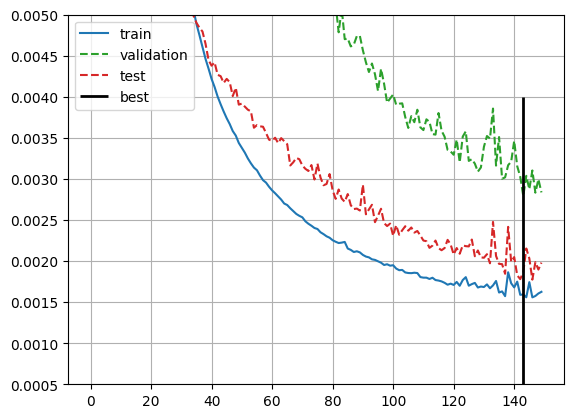

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(lstm.train_losses, c='tab:blue', label='train')
plt.plot(lstm.validation_losses, c='tab:green', ls='--', label='validation')
plt.plot(lstm.test_losses, c='tab:red', ls='--', label='test')
plt.vlines(x=np.argmin(lstm.validation_losses), ymin=0.0005, ymax=0.004, color='black', lw=2, label='best')
plt.ylim(0.0005, 0.005)
plt.legend()
plt.grid()

In [6]:
load_last = False

lstm = Model(data=data, module=module, model_params=model_params, data_params=data_params,
             load=load, load_last=load_last)

2025-02-21 10:37:17.631 | INFO     | pcnn.data:__init__:12 - Preparing the data...
2025-02-21 10:37:17.633 | INFO     | pcnn.data:check_columns:106 - Sanity check of the columns:
[('Case', ['Case']), ('Room temp', ['Temperature 272', 'Temperature 273', 'Temperature 274']), ('Room power', ['Power 272', 'Power 273', 'Power 274']), ('Out temp', ['Outside temperature'])]
2025-02-21 10:37:17.634 | INFO     | pcnn.data:check_columns:116 - Inputs used in D:
['Solar irradiation' 'Month sin' 'Month cos' 'Weekday' 'Timestep sin'
 'Timestep cos']
2025-02-21 10:37:17.634 | INFO     | pcnn.data:__init__:55 - Normalizing the data...
2025-02-21 10:37:17.650 | INFO     | pcnn.data:prepare_data:235 - Data ready!

2025-02-21 10:37:17.653 | INFO     | pcnn.model:load:811 - Trying to load a trained model...
2025-02-21 10:37:17.671 | INFO     | pcnn.model:load:861 - Found! It contains 7714 training, 2264 validation, and 1225 test sequences.
2025-02-21 10:37:17.672 | INFO     | pcnn.model:load:865 - The mod